In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st
import math

In [2]:
# Load Results
df = pd.read_csv('./Experiments/10,000_Trials_#1/stats.csv', sep=',', header=0)

In [3]:
# Scoring function
def get_score(target):
    accuracy_reciprocal_sum = sum(df[f'{target} - accuracy'].rdiv(1))
    precision_reciprocal_sum = sum(df[f'{target} - precision'].rdiv(1))
    trials_num = len(df)
    accuracy_sum = sum(df[f'{target} - accuracy'])
    time_to_fit_ms = st.mean(df[f'{target} - time to fit']/1000000)

    score = 0.14 * (trials_num / (precision_reciprocal_sum)) + 0.85 * (accuracy_sum / trials_num) - (0.01 * math.log(time_to_fit_ms, 12))
    return score 

In [4]:
# models 
models = ['SVC', 'GradientBoosting', 'GaussianNB', 'DecisionTree', 'KNeighbors', 'AdaBoost', 'RandomForest', 'MLP', 'QDA', 'CatBoost', 'ExtraTrees', 'Bagging', 'Ridge', 'PassiveAggressive', 'SGDOneClassSVM', 'Dummy', 'HistGradientBoosting', 'LGBM', 'XGB']
# Diagnosis options
diagnosis_options = ['cath', 'lad', 'lcx', 'rca', 'vhd', 'rwma']

In [5]:
# Scores
for options in diagnosis_options:
    scores = {}
    for model in models:
        scores.update({model: get_score(f'{options} - {model}')})

    all_scores_sorted = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))
    print(options)
    for index, (key, value) in enumerate(all_scores_sorted.items()):
        print(f'{index + 1}. {key}: {value}')

cath
1. GaussianNB: 0.9898664646229245
2. DecisionTree: 0.9897728590165427
3. AdaBoost: 0.9878178755953072
4. Bagging: 0.9809914168566755
5. PassiveAggressive: 0.9807726125247448
6. CatBoost: 0.9783772462694391
7. GradientBoosting: 0.9767888262430073
8. SVC: 0.9760720211712683
9. XGB: 0.9754707915051002
10. QDA: 0.9725719326440863
11. ExtraTrees: 0.9725446454339217
12. LGBM: 0.9707791620813562
13. Ridge: 0.9697297719786714
14. HistGradientBoosting: 0.9685531574895393
15. MLP: 0.9603703464276631
16. KNeighbors: 0.9370577006744899
17. RandomForest: 0.8244503509071608
18. Dummy: 0.7530286686087452
19. SGDOneClassSVM: 0.6204886928988445
lad
1. DecisionTree: 0.9899277057722461
2. AdaBoost: 0.9881462358357127
3. PassiveAggressive: 0.9859331749167435
4. GaussianNB: 0.9852437732569109
5. Bagging: 0.9810619100519722
6. CatBoost: 0.9796067589400523
7. GradientBoosting: 0.9768295541564862
8. XGB: 0.9756833521135205
9. SVC: 0.9744571321255492
10. ExtraTrees: 0.9733878707872544
11. LGBM: 0.97181679

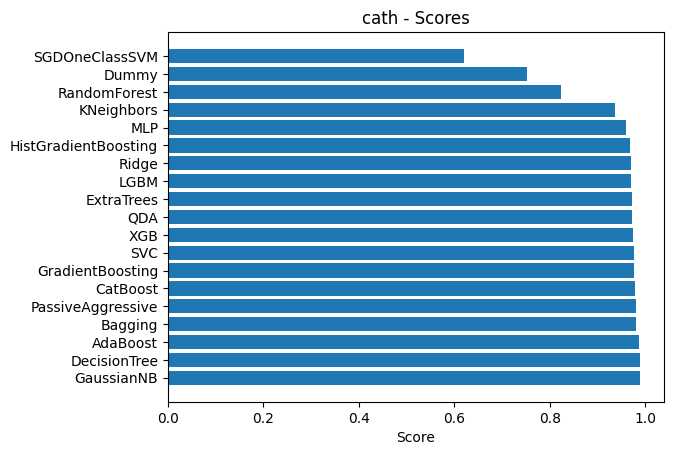

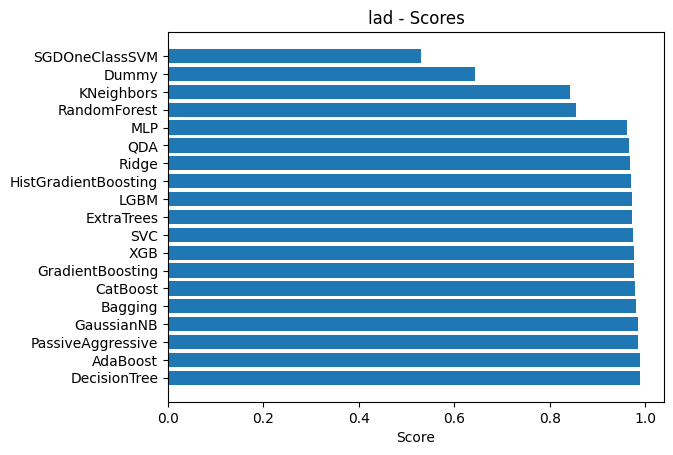

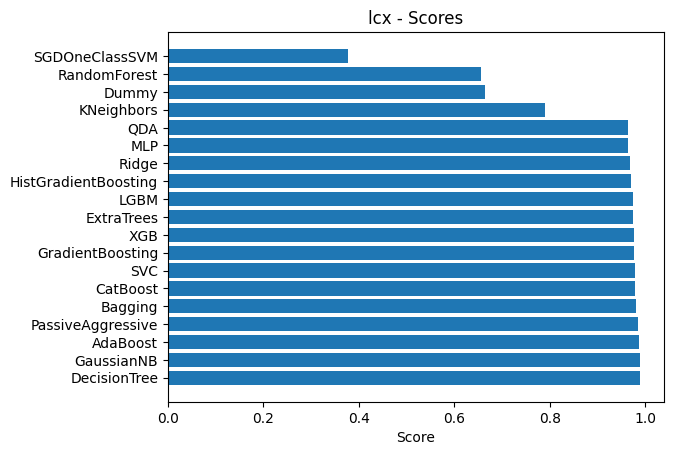

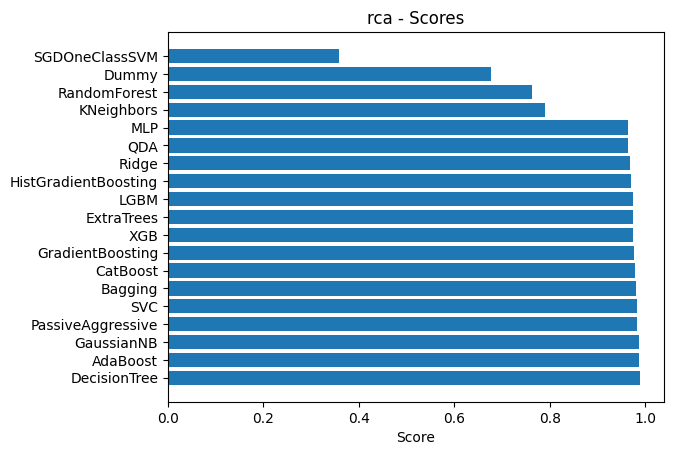

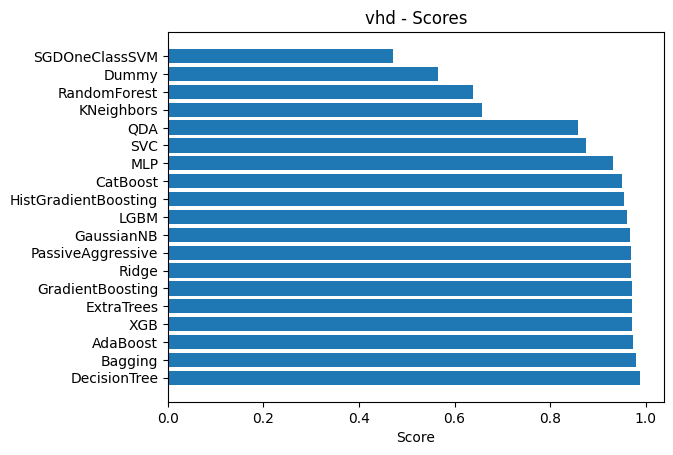

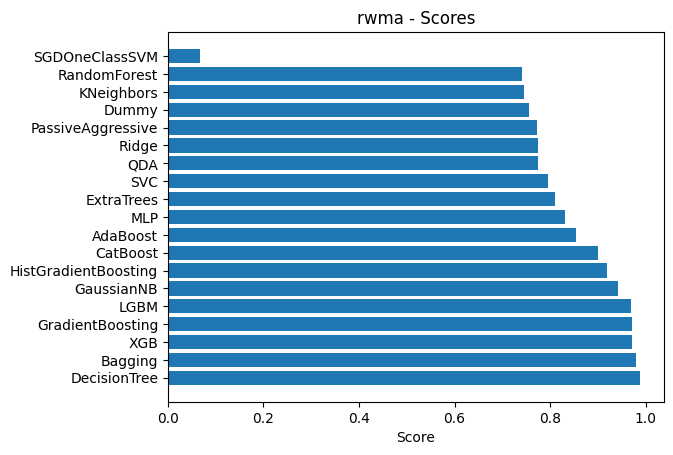

In [6]:
# Create a horizontal bar plot of all scores for every type of diagnosis
for options in diagnosis_options:
    scores = {}
    for model in models:
        scores.update({model: get_score(f'{options} - {model}')})

    all_scores_sorted = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))
    plt.barh(range(len(all_scores_sorted)), list(all_scores_sorted.values()), align='center')
    plt.yticks(range(len(all_scores_sorted)), list(all_scores_sorted.keys()))
    plt.xlabel('Score')
    plt.title(f'{options} - Scores')
    plt.show()